Using the "Boston" housing price dataset, predict whether the house value is above the overall median, using a decision tree classifier.

- Add a target variable which indicates whether medv is above the median
- Split the data into 80% train and 20% test
- Fit a scikit-learn Decision-Tree Classifier
- Display the test and train confusion matrices

In [1]:
import pandas as pd
boston_df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/refs/heads/master/Notebooks/Data/Boston.csv")

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(random_state=211)

model_data = boston_df.copy()
model_data['medv_high']  = model_data['medv'] > model_data['medv'].median()
X = model_data[[c for c in model_data.columns if c not in ('medv', 'medv_high')]]
y = model_data['medv_high']

# Split the data, fit the model, make predictions for train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=211, test_size=0.2)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


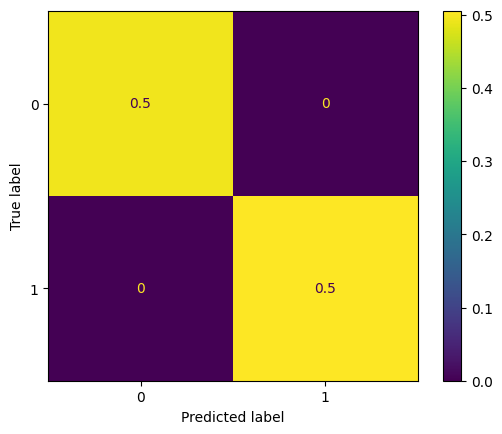

In [3]:
# Display the train confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


train_cm = confusion_matrix(y_train, y_train_pred, normalize='all')

ConfusionMatrixDisplay(train_cm).plot()

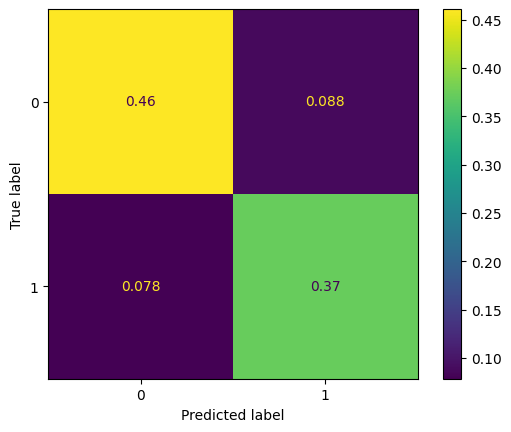

In [4]:
# Display the test confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred, normalize='all')
ConfusionMatrixDisplay(test_cm).plot()

The model shows signs of overfitting as it performs perfectly on the training data but less accurately on the test data. To improve generalization, techniques like pruning or cross-validation may be needed to prevent overfitting.

* Scikit-learn has built-in tools for visualizing trees (sklearn.tree.plot_tree), but dtreeviz has more features. Fit a smaller decision tree classifier with at most 5 leaf nodes, and visualize the tree produced using dtreeviz.

In [5]:
%pip install --quiet dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


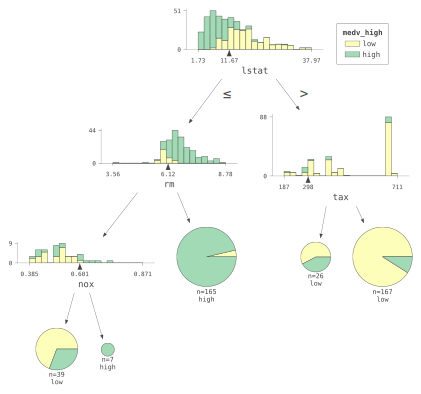

In [6]:
import dtreeviz

small_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=211)
small_tree.fit(X_train, y_train)

viz_model = dtreeviz.model(
    small_tree,
    X_train=X_train,
    y_train=y_train,
    feature_names = X_train.columns,
    target_name=y_train.name,
    class_names=["low", "high"]
)
viz_model.view(
    fontname="monospace" # Use a font family which is installed to avoid warnings
)

The decision tree first splits on the feature lstat (lower status of the population). For the feature average number of rooms, the splitting value is 6.12. When considering the nox (nitrogen oxides concentration) variable, lower values of nox generally lead to a higher proportion of predicted high-price housing. However, for nox values above 0.601, some houses are still predicted to be high-price, although the majority are predicted to be low-price. This indicates that lower nitrogen oxide concentrations are typically associated with higher housing prices, but higher concentrations do not completely rule out the possibility of high-price homes.